# State the region and the domain category that your data sets are about.

### R: Brazil, North states electoral data comparison

In [31]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

In [32]:
import pandas as pd
import glob

all_files_2018 = glob.glob("2018/north/*.csv")
li = []

for filename in all_files_2018:
    au = pd.read_csv(filename, index_col=None, sep = ';', encoding='latin1')
    au['YEAR'] = 2018
    li.append(au)

df = pd.concat(li, axis=0, ignore_index=True)

sel_cols = ['SG_PARTIDO','QT_VOTOS_NOMINAIS','YEAR']

df = df[sel_cols]
df.shape

(38185, 3)

In [33]:

all_files_2014 = glob.glob("2014/north/*.txt")
li = []

for filename in all_files_2014:    
    au = pd.read_csv(filename, header=None, index_col=None, sep = ';', encoding='latin1')
    au['YEAR'] = 2014
    li.append(au)   
    
df2 = pd.concat(li, axis=0, ignore_index=True)

df2 = df2[[15,18,'YEAR']]
df2.columns = ['SG_PARTIDO','QT_VOTOS_NOMINAIS','YEAR']
df2.shape

(36555, 3)

In [34]:
df = pd.concat([df,df2], axis=0, ignore_index=True)
df.head()

,SG_PARTIDO,QT_VOTOS_NOMINAIS,YEAR
0,PT,5844.0,2018
1,PP,333.0,2018
2,PT,569.0,2018
3,PT,1596.0,2018
4,PT,926.0,2018


In [35]:
df.SG_PARTIDO.unique()

array(['PT', 'PP', 'REDE', 'DEM', 'PRTB', 'DC', 'PTC', 'PV', 'AVANTE',
       'PSL', 'PRB', 'PDT', 'PTB', 'PSB', 'PMN', 'PHS', 'MDB', 'PRP',
       'PSD', 'PATRI', 'PPL', 'PSOL', 'SOLIDARIEDADE', 'PROS', 'PSC',
       'PPS', 'PC do B', 'PODE', 'PMB', 'PR', 'PSDB', 'PSTU', 'PCB',
       'NOVO', 'PT do B', 'PTN', 'PSDC', 'PMDB', 'PEN', 'SD'],
      dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74740 entries, 0 to 74739
Data columns (total 3 columns):
SG_PARTIDO           74740 non-null object
QT_VOTOS_NOMINAIS    72649 non-null float64
YEAR                 74740 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [37]:
parties = pd.read_csv('political-parties.csv')
parties.columns = ['SG_PARTIDO','IDEOLOGY']

parties['IDEOLOGY'] = parties['IDEOLOGY'].apply(lambda x: x.upper())
parties['SG_PARTIDO'] = parties['SG_PARTIDO'].apply(lambda x: str(x).replace(' ', '').upper())
df['SG_PARTIDO'] = df['SG_PARTIDO'].apply(lambda x: str(x).replace(' ', '').upper())
df = pd.merge(df, parties, on='SG_PARTIDO',how='inner')

In [38]:
df.head()

,SG_PARTIDO,QT_VOTOS_NOMINAIS,YEAR,IDEOLOGY
0,PT,5844.0,2018,CENTER-LEFT
1,PT,569.0,2018,CENTER-LEFT
2,PT,1596.0,2018,CENTER-LEFT
3,PT,926.0,2018,CENTER-LEFT
4,PT,2178.0,2018,CENTER-LEFT


In [45]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<IPython.core.display.Javascript object>


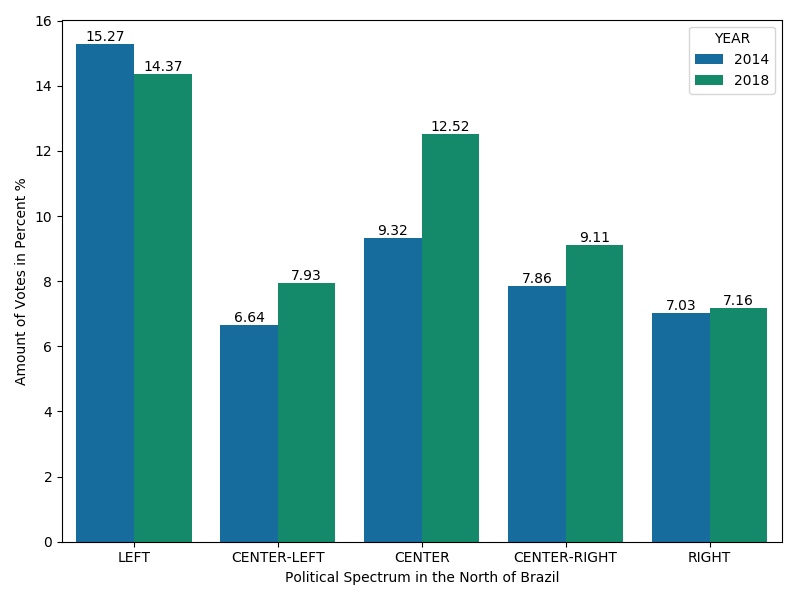

In [57]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6));

g = sns.barplot(ax=ax,x="IDEOLOGY", y="QT_VOTOS_NOMINAIS", hue="YEAR",\
                data=df,estimator=lambda x: len(x) / len(df) * 100);

index = [0,1,2,3,4]
l = ['LEFT','CENTER-LEFT','CENTER','CENTER-RIGHT','RIGHT']
plt.xticks(index,l)
plt.tight_layout()
plt.xlabel("Political Spectrum in the North of Brazil")
plt.ylabel("Amount of Votes in Percent %")
show_values_on_bars(ax)

plt.savefig("graph.png")